In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pwd

/aiffel


In [10]:
data = pd.read_csv('/aiffel/data/trip.csv')

In [11]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [15]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [16]:
# 결측치 판단과 처리
missing_data = data.isnull().sum()

In [17]:
# 결측치 열 필터링
missing_data = missing_data[missing_data > 0]
missing_ratio = (missing_data / len(df)) * 100

In [18]:
print("\n결측치 비율:")
print(missing_ratio)


결측치 비율:
fare_amount    0.013215
dtype: float64


In [25]:
# 결측치 비율이 낮은 경우 (5% 이하) 대체해서 채우고, 높은 경우 (30% 이상) 해당 열 삭제
for col in missing_data.index:
    if missing_ratio[col] <= 5:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)  # 범주형 데이터는 최빈값으로 채움
        else:
            df[col].fillna(df[col].median(), inplace=True)   # 수치형 데이터는 중위값으로 채움
    elif missing_ratio[col] > 30:
        df.drop(columns=col, inplace=True)  # 불필요한 들여쓰기 제거


In [29]:
# 결측치 확인
print("\n결측치 처리 후 남은 결측치 갯수:", df.isna().sum().sum())


결측치 처리 후 남은 결측치 갯수: 0


In [40]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [37]:
# 최대값에서 이상치를 발견. 택시에 36명 승객? 모든 열에 대해 정렬
data = data.apply(lambda x: x.sort_values().values)

In [38]:
print(data)

         passenger_name    tpep_pickup_datetime   tpep_dropoff_datetime  \
0           Aaron Allen  01/01/2017 10:18:50 PM  01/01/2017 10:02:10 AM   
1         Aaron Andrews  01/01/2017 10:36:57 AM  01/01/2017 10:42:59 AM   
2       Aaron Armstrong  01/01/2017 10:37:06 AM  01/01/2017 10:48:29 PM   
3         Aaron Brennan  01/01/2017 10:37:29 AM  01/01/2017 10:50:25 AM   
4        Aaron Campbell  01/01/2017 10:41:45 AM  01/01/2017 10:53:57 AM   
...                 ...                     ...                     ...   
22696  Zachary Williams   12/31/2017 9:02:51 PM   12/31/2017 9:09:43 PM   
22697     Zachary Woods   12/31/2017 9:02:59 PM   12/31/2017 9:19:49 AM   
22698     Zachary Young   12/31/2017 9:11:16 AM   12/31/2017 9:35:39 PM   
22699        Zoe Dorsey   12/31/2017 9:44:13 AM   12/31/2017 9:45:52 PM   
22700        Zoe Larson   12/31/2017 9:57:40 PM   12/31/2017 9:55:19 AM   

      payment_method  passenger_count  trip_distance  fare_amount  tip_amount  \
0               Ca

In [68]:
data['passenger_count'].apply(lambda x: 6 if x>6 else x) #택시에 구겨탈 수 있는 인원을 최대 6명으로 한정.

0        0
1        0
2        0
3        0
4        0
        ..
22696    6
22697    6
22698    6
22699    6
22700    6
Name: passenger_count, Length: 22692, dtype: int64

In [69]:
data = data[data['passenger_count'] != 0 ] #택시요금이 '0'인 행은 이유를 알 수 없으므로 삭제

In [70]:
# 결측치 처리: fare_amount의 결측치(NaN)를 중위값으로 대체
median_fare = data['fare_amount'].median()
data['fare_amount'].fillna(median_fare, inplace=True)

In [71]:
# 택시요금에서 현금 지불로 음수가 발견되므로 중위값 계산 후 대체하기
median_fare = data['fare_amount'].median()

In [72]:
# 음수 요금을 중위값으로 대체
data['fare_amount'] = data['fare_amount'].apply(lambda x: median_fare if x < 0 else x)

In [73]:
print(data['fare_amount'])

33         2.50
34         2.50
35         2.50
36         2.50
37         2.50
          ...  
22696    450.00
22697    999.99
22698      9.50
22699      9.50
22700      9.50
Name: fare_amount, Length: 22668, dtype: float64


In [74]:
data = data[data['fare_amount'] > 1 ] # 택시요금이 1달러 이하인 경우도 이상치로 간주해 제거

In [75]:
data['fare_amount'].sort_values()

33         2.50
101        2.50
100        2.50
99         2.50
98         2.50
          ...  
22693    175.00
22694    200.00
22695    200.01
22696    450.00
22697    999.99
Name: fare_amount, Length: 22668, dtype: float64

In [76]:
data['fare_amount'].apply(lambda x: 450 if x>450 else x) # 999를 최대 요금 450으로 대체

33         2.5
34         2.5
35         2.5
36         2.5
37         2.5
         ...  
22696    450.0
22697    450.0
22698      9.5
22699      9.5
22700      9.5
Name: fare_amount, Length: 22668, dtype: float64

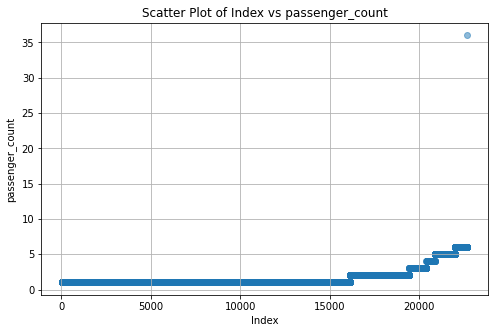

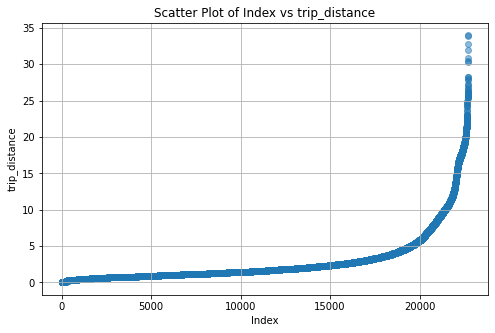

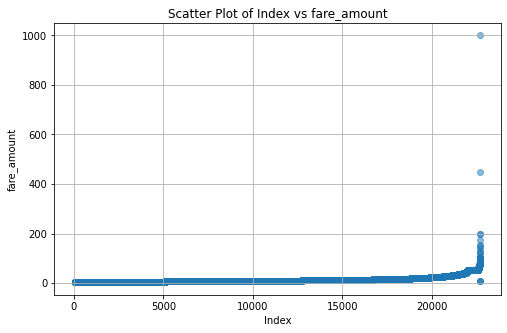

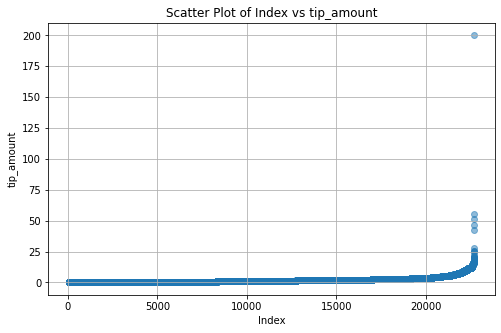

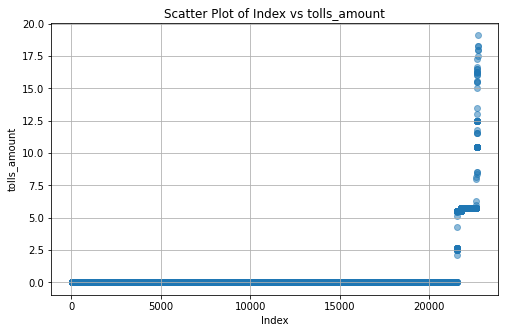

In [78]:
# 숫자형 변수에 대해 산점도 그리기
for column in data.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 5))
    plt.scatter(data.index, data[column], alpha=0.5)
    plt.title(f'Scatter Plot of Index vs {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.grid()
    plt.show()

In [79]:
#  Credit Card와 Debit Card를 모두 Card로 변경
data['payment_method'] = data['payment_method'].replace({'Credit Card': 'Card', 'Debit Card': 'Card'})

In [84]:
print(data['payment_method'])

33       Cash
34       Cash
35       Cash
36       Cash
37       Cash
         ... 
22696    Card
22697    Card
22698    Card
22699    Card
22700    Card
Name: payment_method, Length: 22668, dtype: object
